#### Name: Maitri D. Savla
#### Mail ID: maitrisavla2003@gmail.com

# Importing all essential libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Reading the dataset

In [2]:
df = pd.read_csv('Fraud.csv', index_col=False)

# Viewing the dataset

In [16]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Analysis of the dataset

In [15]:
df.shape

(6362620, 11)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Checking for Null Values

In [18]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Checking for Duplicated Values

In [19]:
df.duplicated().sum()

0

Checking number of unique values of each column

In [20]:

df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [21]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Checking the count of Instances categorized as a Fraud and Not a Fraud.
- If 'isFraud' is 0 means no fraud has been taken place.
- If 'isFraud' is 1 it means it is a fraud transaction.

In [23]:
# Count the instances of 0 and 1 in the 'isFraud' column
isFraud_counts = df['isFraud'].value_counts()
isFraud_counts

isFraud
0    6354407
1       8213
Name: count, dtype: int64

Checking the count of Instances categorized as a Flagged Fraud.
- If 'isFlaggedFraud' is 0 means the business model did not flag any illegeal attempst of transfer. The transfer amount is less than 200.000 in a single transaction.
- If 'isFraud' is 1 it means the business model aims to control massive transfer from one account to another and Flags it as illegal attempt.

In [24]:
isFlaggedFraud_counts = df['isFlaggedFraud'].value_counts()
isFlaggedFraud_counts

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [25]:
# Filter the DataFrame to get the instances where both 'isFraud' and 'isFlaggedFraud' are 1
fraud_and_flagged_count = df[(df['isFraud'] == 1) & (df['isFlaggedFraud'] == 1)].shape[0]

print(f"The count of instances where both isFraud and isFlaggedFraud are 1: {fraud_and_flagged_count}")

The count of instances where both isFraud and isFlaggedFraud are 1: 16


CONCLUSION: By executing the above query we confirm and conclude that the instances for whom 'isFlaggedFraud' is 1 also has 'isFraud' value to be 1.

Counting the type of Payment and frequency of every type of Payment

In [26]:
# Count the occurrences of each type of payment
type_counts = df['type'].value_counts()

print("Count of each type of payment:")
print(type_counts)

Count of each type of payment:
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


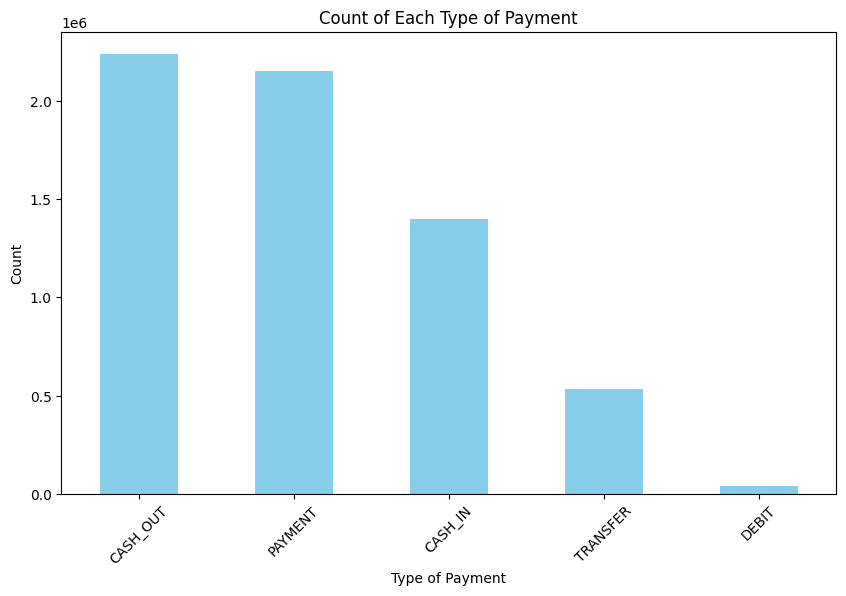

In [27]:
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Each Type of Payment')
plt.xlabel('Type of Payment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

From the above graph we can conclude that 'CASH_OUT' type of payment is the highest practised type of payment whereas 'DEBIT' is the least practised type of payment. 

In [28]:
# Group by 'type' and sum the 'isFraud' values
fraud_counts_by_type = df.groupby('type')['isFraud'].sum()

print("Number of fraudulent transactions for each type of payment:")
print(fraud_counts_by_type)

Number of fraudulent transactions for each type of payment:
type
CASH_IN        0
CASH_OUT    4116
DEBIT          0
PAYMENT        0
TRANSFER    4097
Name: isFraud, dtype: int64


- From the above query we can conclude that the fraud transaction are occuring only in 'CASH_OUT' and 'TRANSFER' payment.
- This is a very important point. With this we can think of truncating our original dataset which has 5 types of payment to only 'CASH_OUT' and 'TRANSFER' type of payment.
- By doing so we can even control the case of Overfitting of the data, as we have seen in previous analalysis that no fraud transactions are very higher than fraud transaction.

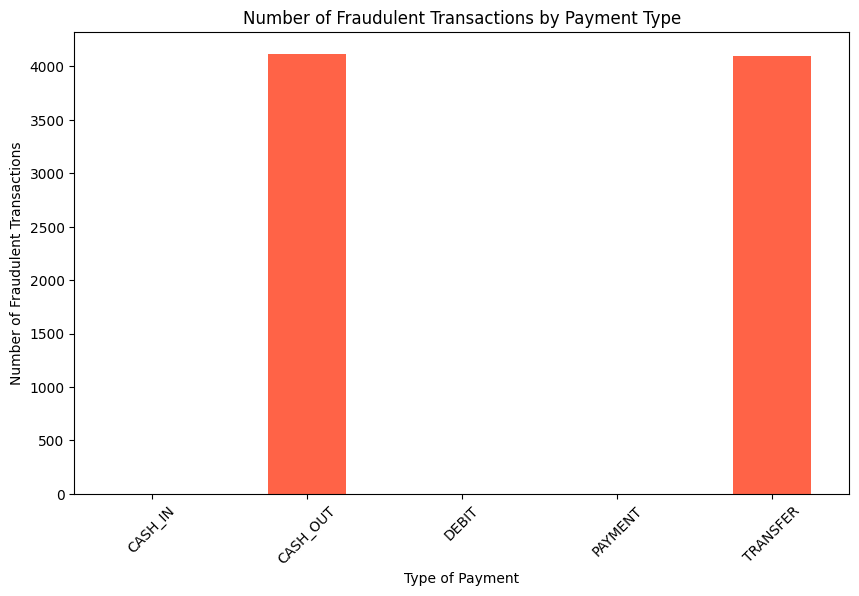

In [30]:

# Plot the number of fraudulent transactions for each type of payment
plt.figure(figsize=(10, 6))
fraud_counts_by_type.plot(kind='bar', color='tomato')
plt.title('Number of Fraudulent Transactions by Payment Type')
plt.xlabel('Type of Payment')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.show()

In [29]:
# Group by 'type' and sum the 'isFlaggedFraud' values
flagged_fraud_counts_by_type = df.groupby('type')['isFlaggedFraud'].sum()

print("Number of flagged fraudulent transactions for each type of payment:")
print(flagged_fraud_counts_by_type)

Number of flagged fraudulent transactions for each type of payment:
type
CASH_IN      0
CASH_OUT     0
DEBIT        0
PAYMENT      0
TRANSFER    16
Name: isFlaggedFraud, dtype: int64


The above query shows us one more interesting observation that all the frauds that are flagged by the business model perform only 'TRANSFER' type of payment.

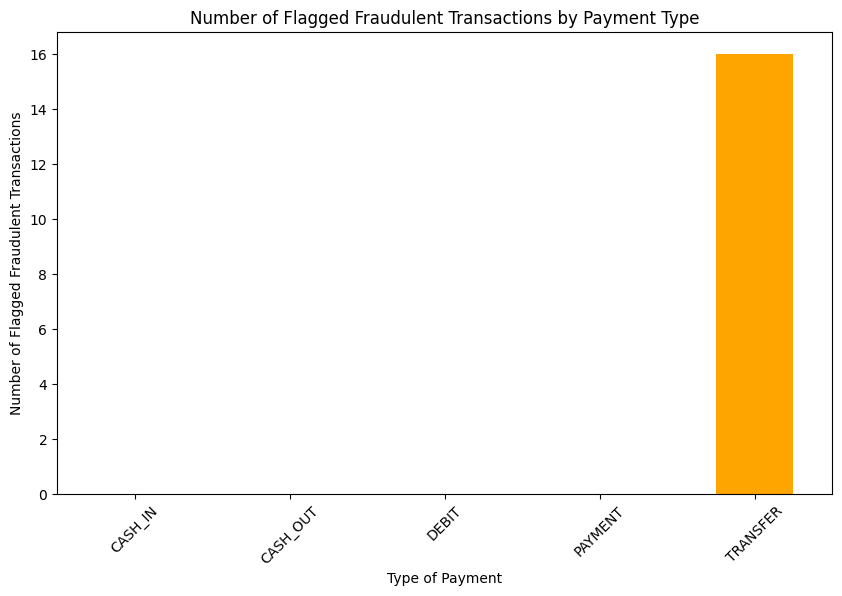

In [31]:
# Plot the number of flagged fraudulent transactions for each type of payment
plt.figure(figsize=(10, 6))
flagged_fraud_counts_by_type.plot(kind='bar', color='orange')
plt.title('Number of Flagged Fraudulent Transactions by Payment Type')
plt.xlabel('Type of Payment')
plt.ylabel('Number of Flagged Fraudulent Transactions')
plt.xticks(rotation=45)
plt.show()

In [33]:
# Filter for rows where both isFraud and isFlaggedFraud are 1
fraud_flagged_cases = df[(df['isFraud'] == 1) & (df['isFlaggedFraud'] == 1)]

# Get the nameOrig values for these cases
names = fraud_flagged_cases['nameOrig'].tolist()
names_unique = fraud_flagged_cases['nameOrig'].unique().tolist()

print("Names of persons for whom isFraud = 1 and isFlaggedFraud = 1:")
print(len(names))
print(len(names_unique))

Names of persons for whom isFraud = 1 and isFlaggedFraud = 1:
16
16


We are running the above query just to check whether all the customer who started the transaction are unique or there are more than one transaction done by a particular user.

In [34]:
fraud_cases = df[df['isFraud'] == 1]
# Get the nameOrig values for these cases
names = fraud_cases['nameOrig'].tolist()
names_unique = fraud_cases['nameOrig'].unique().tolist()

print("Names of persons for whom isFraud = 1 and isFlaggedFraud = 1:")
print(len(names))
print(len(names_unique))

Names of persons for whom isFraud = 1 and isFlaggedFraud = 1:
8213
8213


We can conclude that all 8213 frauds that have occured has targeted all unique customer.

In [39]:
# Filter for rows where isFraud is 1
fraud_cases = df[(df['isFraud'] == 1) & (df['isFlaggedFraud'])]

# Get unique recipients (nameDest) for whom isFraud = 1
unique_recipients_fraudulent = fraud_cases['nameDest'].unique()

print("Unique recipients (nameDest) for whom isFraud = 1:")
print(len(unique_recipients_fraudulent))

Unique recipients (nameDest) for whom isFraud = 1:
16


In [40]:
# Filter for rows where isFraud is 1
fraud_cases = df[(df['isFraud'] == 1)]

# Get unique recipients (nameDest) for whom isFraud = 1
unique_recipients_fraudulent = fraud_cases['nameDest'].unique()

print("Unique recipients (nameDest) for whom isFraud = 1:")
print(len(unique_recipients_fraudulent))

Unique recipients (nameDest) for whom isFraud = 1:
8169


We could observe that even though we had all unique customer who initiated the transaction but all recipients are not unique. 

In [42]:
# Count occurrences of each recipient name (nameDest)
recipient_counts = fraud_cases['nameDest'].value_counts()

# Filter to find names that are non-unique and their occurrence count
non_unique_names = recipient_counts[recipient_counts > 1]
print("Total number of non-unique names ",len(non_unique_names))
# Print in a table format
print("Non-Unique Recipient Names and Their Frequencies:")
print("----------------------------------------------")
print("Recipient Name (nameDest)    |   Frequency")
print("----------------------------------------------")
for name, count in non_unique_names.items():
    print(f"{name:<30} |   {count}")

Total number of non-unique names  44
Non-Unique Recipient Names and Their Frequencies:
----------------------------------------------
Recipient Name (nameDest)    |   Frequency
----------------------------------------------
C1193568854                    |   2
C104038589                     |   2
C200064275                     |   2
C1497532505                    |   2
C1601170327                    |   2
C1655359478                    |   2
C2020337583                    |   2
C1653587362                    |   2
C1013511446                    |   2
C2129197098                    |   2
C1366192319                    |   2
C1185292292                    |   2
C668046170                     |   2
C1837027614                    |   2
C1148781766                    |   2
C904300960                     |   2
C1325541393                    |   2
C14138104                      |   2
C1827219533                    |   2
C1669818195                    |   2
C644163395                     |   2

We can observe that there are total 44 recipients that participated exactly 2 times in the transfer.

In [47]:
# Now, find the minimum and maximum step sizes for these non-unique recipients
non_unique_recipients = non_unique_names.index
df_non_unique_recipients = fraud_cases[fraud_cases['nameDest'].isin(non_unique_recipients)]
min_step_non_unique = df_non_unique_recipients['step'].min()
max_step_non_unique = df_non_unique_recipients['step'].max()

print("\nMinimum step size for non-unique recipients where isFraud = 1:", min_step_non_unique)
print("Maximum step size for non-unique recipients where isFraud = 1:", max_step_non_unique)


Minimum step size for non-unique recipients where isFraud = 1: 4
Maximum step size for non-unique recipients where isFraud = 1: 736


In [45]:

# Checking for rows where isFraud is 1 and recipient is 'C1193568854'
fraudulent_payments = df[(df['isFraud'] == 1) & (df['nameDest'] == 'C1193568854')]

# Print the instances
print("Instances where recipient 'C1193568854' participated in fraud payments:")
print(fraudulent_payments)

Instances where recipient 'C1193568854' participated in fraud payments:
         step      type     amount     nameOrig  oldbalanceOrg  \
6055674   497  CASH_OUT  224570.45  C1401604030      224570.45   
6362537   736  CASH_OUT  172915.56   C962323728      172915.56   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
6055674             0.0  C1193568854      7449938.25      7674508.70        1   
6362537             0.0  C1193568854      7674508.70      7847424.27        1   

         isFlaggedFraud  
6055674               0  
6362537               0  


In [69]:



# Checking for rows where isFraud is 1 and recipient is 'C1193568854'
fraudulent_payments = df[(df['isFraud'] == 1) & (df['nameDest'] == 'C104038589')]

# Print the instances
print("Instances where recipient 'C104038589' participated in fraud payments:")
print(fraudulent_payments)

Instances where recipient 'C104038589' participated in fraud payments:
             type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
788647   TRANSFER   152042.16  C1118399210      152042.16             0.0   
1030368  CASH_OUT  2050727.81   C992917413     2050727.81             0.0   

           nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
788647   C104038589             0.0            0.00        1               0  
1030368  C104038589             0.0      2050727.81        1               0  


In [70]:



# Checking for rows where isFraud is 1 and recipient is 'C644163395'
fraudulent_payments = df[(df['isFraud'] == 1) & (df['nameDest'] == 'C644163395')]

# Print the instances
print("Instances where recipient 'C644163395' participated in fraud payments:")
print(fraudulent_payments)

Instances where recipient 'C644163395' participated in fraud payments:
             type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
1030568  CASH_OUT  684796.16  C1555882195      684796.16             0.0   
1059579  CASH_OUT  511379.90  C1440012977      511379.90             0.0   

           nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
1030568  C644163395      2754453.54       3439249.7        1               0  
1059579  C644163395      3439249.70       3950629.6        1               0  


In [49]:

# Filter the DataFrame for these non-unique recipients
df_non_unique_recipients = fraud_cases[fraud_cases['nameDest'].isin(non_unique_recipients)]

# Display all instances of the non-unique recipients
print("All instances of the 44 non-unique recipients where isFraud = 1:")
print(df_non_unique_recipients)

All instances of the 44 non-unique recipients where isFraud = 1:
         step      type      amount     nameOrig  oldbalanceOrg  \
4693        4  TRANSFER    13707.11    C17222024       13707.11   
4858        5  CASH_OUT   120074.73  C1174000532      120074.73   
5124        5  CASH_OUT    60726.57   C840095827       60726.57   
5994        6  TRANSFER    30521.02   C903383636       30521.02   
49826       9  CASH_OUT  2539898.07   C728718059     2539898.07   
...       ...       ...         ...          ...            ...   
6312188   686  CASH_OUT   160088.68   C590262415      160088.68   
6362339   720  CASH_OUT    79039.81   C838045354       79039.81   
6362379   724  CASH_OUT    89845.29  C1281420811       89845.29   
6362449   730  CASH_OUT      403.56  C1790729382         403.56   
6362537   736  CASH_OUT   172915.56   C962323728      172915.56   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
4693                0.0   C410033330            0

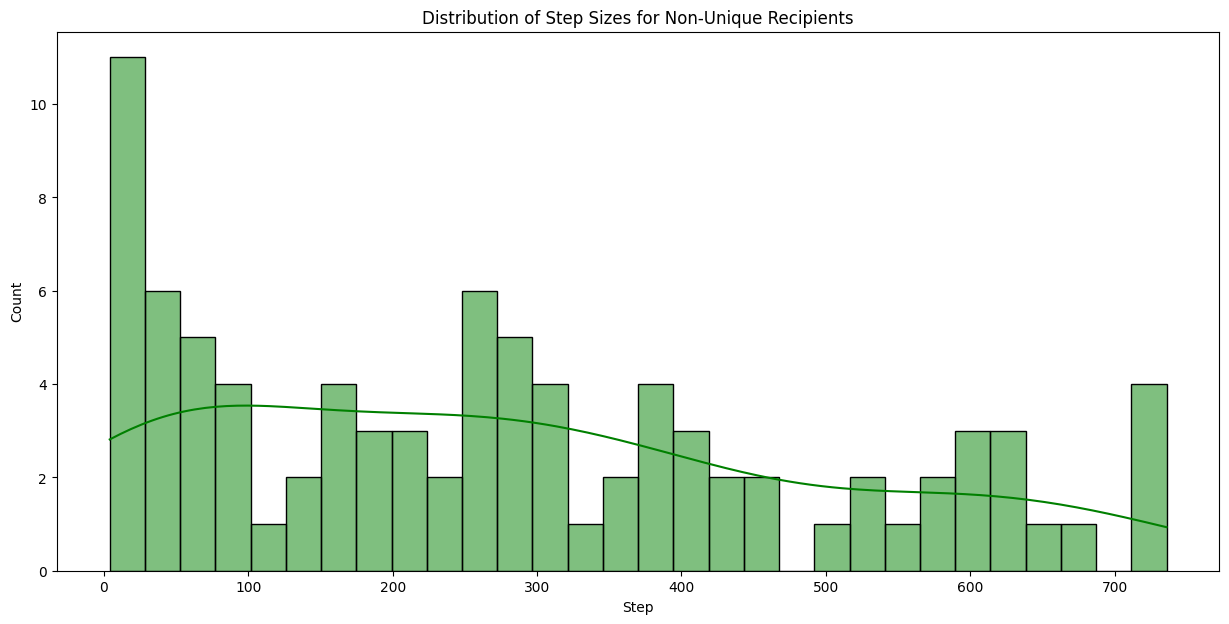

In [53]:
# Create the plot using seaborn
plt.figure(figsize=(15, 7))

# Left plot - Distribution of transaction amounts with kde
plt.subplot(111)
sns.histplot(data=df_non_unique_recipients, x='step', bins=30, kde=True, color='g')
plt.title('Distribution of Step Sizes for Non-Unique Recipients')
plt.xlabel('Step')
plt.ylabel('Count')

plt.show()

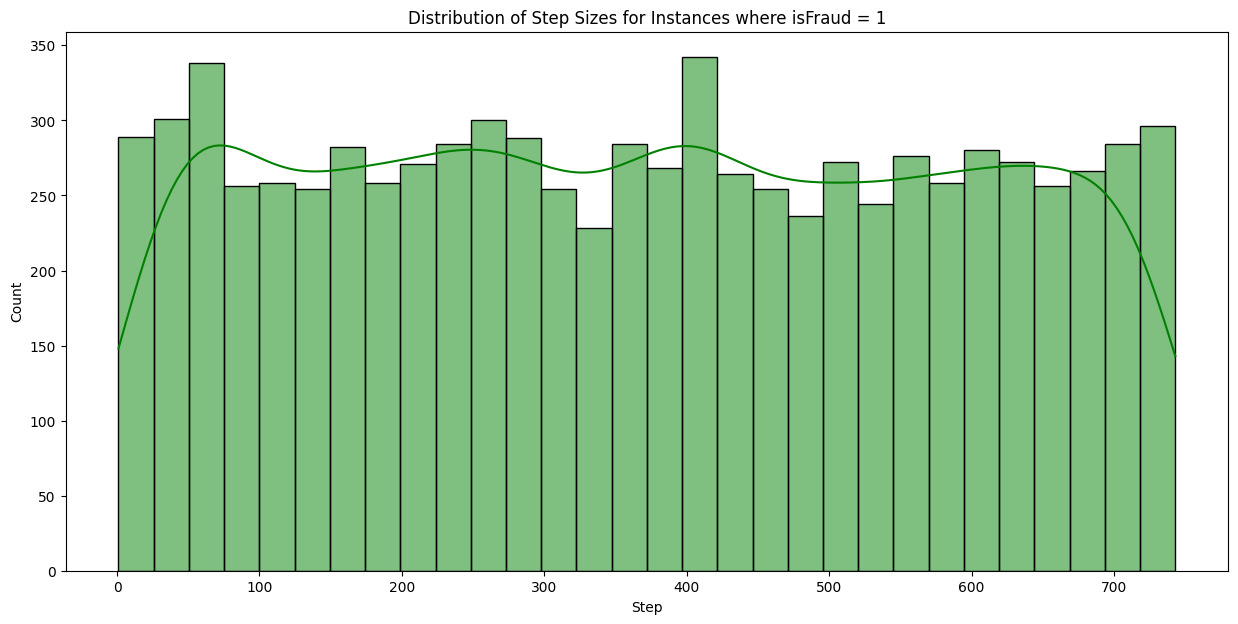

In [54]:
# Filter for rows where isFraud is 1
fraud_cases = df[df['isFraud'] == 1]

# Create the plot using seaborn
plt.figure(figsize=(15, 7))

# Distribution of step sizes with kde
sns.histplot(data=fraud_cases, x='step', bins=30, kde=True, color='g')
plt.title('Distribution of Step Sizes for Instances where isFraud = 1')
plt.xlabel('Step')
plt.ylabel('Count')

plt.show()

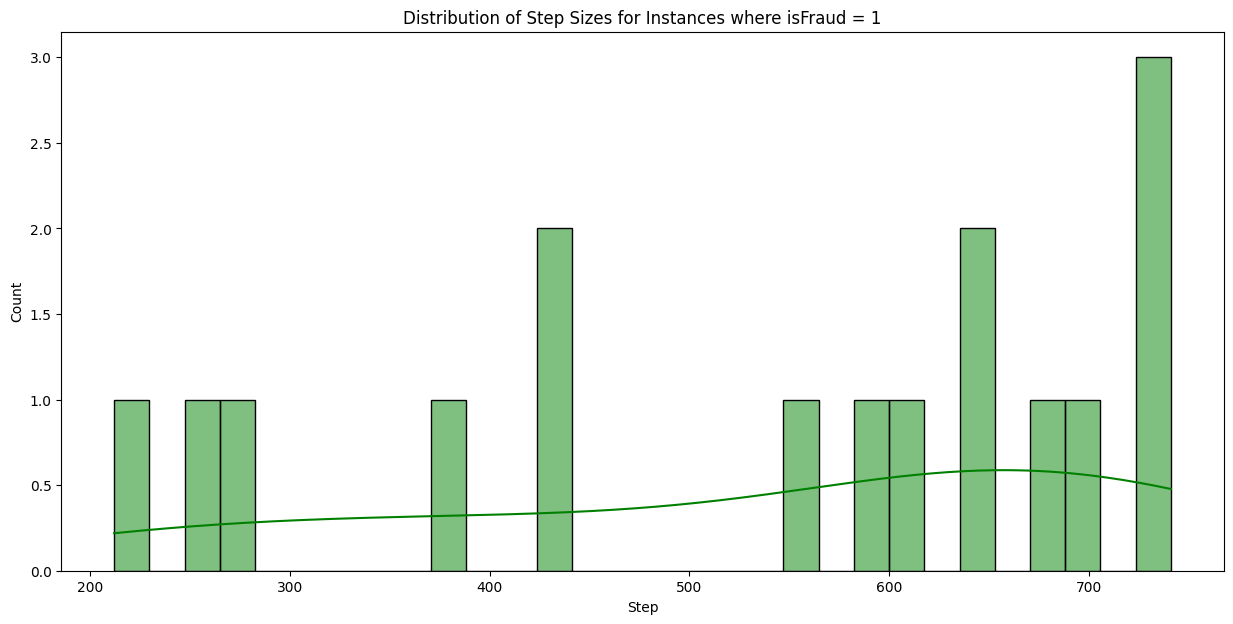

In [55]:
# Filter for rows where isFraud is 1
flagged_fraud_cases = df[df['isFlaggedFraud'] == 1]

# Create the plot using seaborn
plt.figure(figsize=(15, 7))

# Distribution of step sizes with kde
sns.histplot(data=flagged_fraud_cases, x='step', bins=30, kde=True, color='g')
plt.title('Distribution of Step Sizes for Instances where isFraud = 1')
plt.xlabel('Step')
plt.ylabel('Count')

plt.show()

- From the above graph we can observe that fraud transactions are independent or we can say uniformly distributed accross steps. But the frequency of flagged fraud occuring is highest after 700 steps. 
- But to detect whether the transaction is fraud or not, we can exclude the feature 'step' from the dataframe. 

### Modification in the Dataframe
- From all the type of payment, we will restrict it to 'TRANSFER' and 'CASH_OUT' type of payment method.
- We will remove the feature 'step' from the dataframe 

In [3]:
# Filter for transactions where type is 'CASH_OUT' or 'TRANSFER'
df = df[(df['type'] == 'CASH_OUT') | (df['type'] == 'TRANSFER')]

# Remove the 'step' column from the DataFrame
df.drop(columns=['step'], inplace=True)


In [57]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [58]:
df.shape

(2770409, 10)

- With all the above analysis and observation, we have reduced the size of the dataframe from (6362620, 11) to (2770409, 10).
- The advantage of doing this is that we can control the problem of overfitting.

In [59]:
# Count the instances of 0 and 1 in the 'isFraud' column
isFraud_counts = df['isFraud'].value_counts()
isFraud_counts

isFraud
0    2762196
1       8213
Name: count, dtype: int64

In [60]:
df.nunique()

type                    2
amount            2685805
nameOrig          2768630
oldbalanceOrg      435702
newbalanceOrig     271977
nameDest           509565
oldbalanceDest    2360852
newbalanceDest    2562844
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [61]:
# Group by customer (nameOrig) and count occurrences of isFraud=1 and isFraud=0
fraudulent_customers = df[df['isFraud'] == 1]['nameOrig'].unique()
non_fraudulent_customers = df[df['isFraud'] == 0]['nameOrig'].unique()

# Find the intersection of customers involved in both isFraud=1 and isFraud=0
common_customers = set(fraudulent_customers).intersection(non_fraudulent_customers)

# Number of customers involved in both isFraud=1 and isFraud=0
num_common_customers = len(common_customers)

print(f"Number of customers involved in both isFraud=1 and isFraud=0: {num_common_customers}")

Number of customers involved in both isFraud=1 and isFraud=0: 16


In [63]:
# Filter the original DataFrame for these common customers
common_customers_df = df[df['nameOrig'].isin(common_customers)]

# Count how many of these common customers have isFlaggedFraud=1
common_customers_with_flagged_fraud = common_customers_df[common_customers_df['isFlaggedFraud'] == 1]['nameOrig'].nunique()

print(f"Number of common customers with isFlaggedFraud=1: {common_customers_with_flagged_fraud}")

Number of common customers with isFlaggedFraud=1: 0


In [65]:
# Group by 'nameOrig' and count occurrences of isFraud=1 for each nameOrig
fraud_count_per_nameOrig = df[df['isFraud'] == 1].groupby('nameOrig').size()

# Filter for nameOrig values with more than one occurrence of isFraud=1
nameOrig_with_multiple_frauds = fraud_count_per_nameOrig[fraud_count_per_nameOrig > 1].index

# Print the results
if not nameOrig_with_multiple_frauds.empty:
    print("nameOrig values with more than one occurrence of isFraud=1:")
    print(nameOrig_with_multiple_frauds)
else:
    print("No nameOrig values found with more than one occurrence of isFraud=1.")

No nameOrig values found with more than one occurrence of isFraud=1.


In [68]:
# Group by 'nameDest' and count occurrences of isFraud=1 for each nameDest
fraud_count_per_nameDest = df[df['isFraud'] == 1].groupby('nameDest').size()

# Filter for nameDest values with more than one occurrence of isFraud=1
nameDest_with_multiple_frauds = fraud_count_per_nameDest[fraud_count_per_nameDest > 1].index

# Print the results
if not nameDest_with_multiple_frauds.empty:
    print("nameDest values with more than one occurrence of isFraud=1:")
    print(nameDest_with_multiple_frauds)
    print(len(nameDest_with_multiple_frauds))
else:
    print("No nameDest values found with more than one occurrence of isFraud=1.")

nameDest values with more than one occurrence of isFraud=1:
Index(['C1013511446', 'C104038589', 'C105660024', 'C1148781766', 'C1185292292',
       'C1193568854', 'C1259079602', 'C1325541393', 'C1366192319',
       'C1399829166', 'C14138104', 'C1460854172', 'C1497532505', 'C1601170327',
       'C1650668671', 'C1653587362', 'C1655359478', 'C1656842502',
       'C1669818195', 'C1780714769', 'C1827219533', 'C1827800010',
       'C1837027614', 'C185805228', 'C1980653895', 'C1981613973', 'C200064275',
       'C2020337583', 'C2129197098', 'C385133759', 'C410033330', 'C475338087',
       'C505532836', 'C52390890', 'C643624257', 'C644163395', 'C650699445',
       'C668046170', 'C686334805', 'C803116137', 'C904300960', 'C935310781',
       'C964377943', 'C967226405'],
      dtype='object', name='nameDest')
44


In [64]:
# Group by 'nameOrig' and 'nameDest', count occurrences of each pair
transactions_per_pair = df.groupby(['nameOrig', 'nameDest']).size().reset_index(name='transaction_count')

# Filter pairs where transaction_count is greater than 1
multiple_transactions_pairs = transactions_per_pair[transactions_per_pair['transaction_count'] > 1]

# Display the pairs with more than one transaction
if not multiple_transactions_pairs.empty:
    print("Pairs with more than one transaction:")
    print(multiple_transactions_pairs)
else:
    print("No pairs with more than one transaction found.")

No pairs with more than one transaction found.


- The above code ensures that even though any 'nameOrig' or 'nameDest' are present more than one time in a dataset, but there is no multiple transaction occuring between the pairs.
- The pairwise transaction are unique in nature.

In [71]:
# Filter for instances where isFraud = 1 and newBalanceOrig = 0
instances_isFraud1_newBalance0 = df[(df['isFraud'] == 1) & (df['newbalanceOrig'] == 0)]

# Count the number of instances
num_instances = len(instances_isFraud1_newBalance0)

print(f"Number of instances where isFraud = 1 and newBalanceOrig = 0: {num_instances}")

Number of instances where isFraud = 1 and newBalanceOrig = 0: 8053


We can observe that out of 8213 fraud instances, we have 8053 instances whose "newBalanceOrig = 0".
This is one of the impactful observation to identify fraud transaction

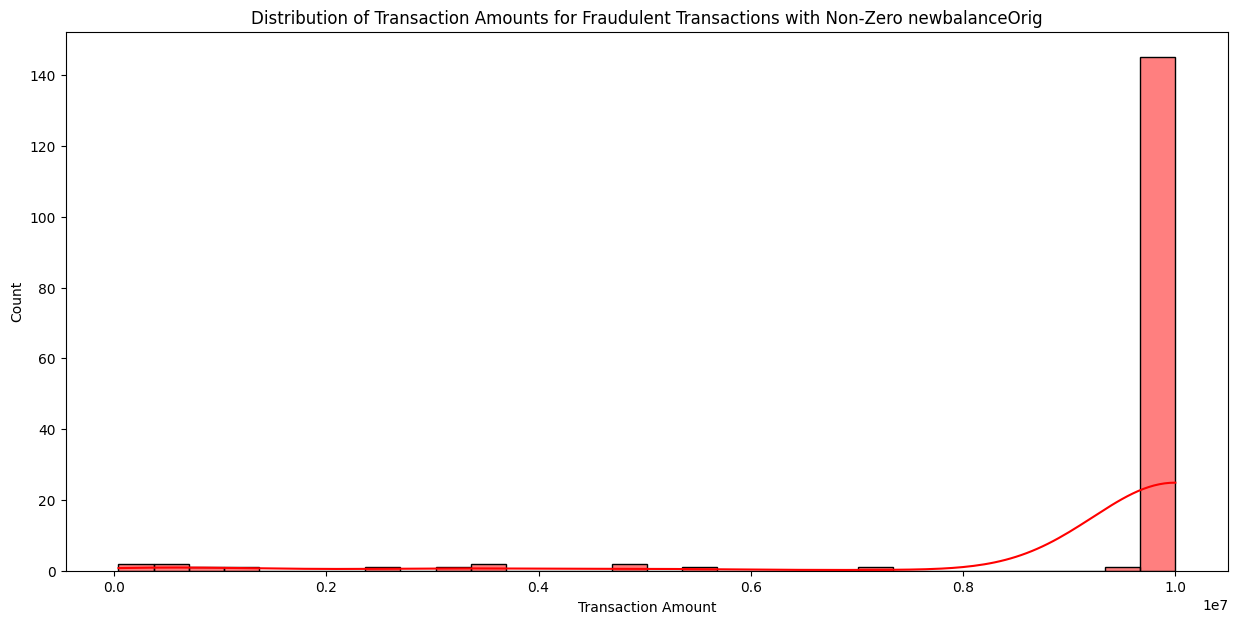

In [72]:
# Filter for instances where isFraud = 1 and newbalanceOrig is not 0
fraud_transactions_nonzero_newbalance = df[(df['isFraud'] == 1) & (df['newbalanceOrig'] != 0)]

# Plot the distribution of transaction amounts (as an example)
plt.figure(figsize=(15, 7))

# Distribution of transaction amounts for fraudulent transactions with non-zero newbalanceOrig
sns.histplot(data=fraud_transactions_nonzero_newbalance, x='amount', bins=30, kde=True, color='r')
plt.title('Distribution of Transaction Amounts for Fraudulent Transactions with Non-Zero newbalanceOrig')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')

plt.show()

In [74]:
# Filter for instances where isFraud = 1
fraud_transactions = df[df['isFraud'] == 1]

# Find the maximum value of newbalanceOrig in fraud transactions
max_newbalanceOrig = fraud_transactions['newbalanceOrig'].max()

# Print the instance that has the maximum value of newbalanceOrig
max_newbalanceOrig_instance = fraud_transactions[fraud_transactions['newbalanceOrig'] == max_newbalanceOrig]

print("The instance with the maximum value of newbalanceOrig for instances where isFraud = 1:")
print(max_newbalanceOrig_instance)

The instance with the maximum value of newbalanceOrig for instances where isFraud = 1:
             type      amount   nameOrig  oldbalanceOrg  newbalanceOrig  \
5996399  TRANSFER  10000000.0  C40489106    59585040.37     49585040.37   

           nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
5996399  C650095152             0.0             0.0        1               0  


The other type of fraud observed is that the desired amount is getting deducted from the customer account but it is not credited in recipient account.

#### Excluding 'nameOrig' and 'nameDest' from the Dataframe
REASON:
- There is a huge gap between the the fraud transaction and Non-fraud transaction, therefore there is a probability that the model will become biased for a particular 'nameOrig' and 'nameDest' and might fail during testing.
- All the pair of transactions are unique in nature, so it will not help us in tracing any pattern between the customer and the recipient.
- Data privacy is one of the concern. To ensure the compliance with regulations such as GDPR.
- It is the amount of transaction that decides whether the fraud has taken place or not.

In [4]:


# Drop the 'nameOrig' and 'nameDest' columns
df= df.drop(['nameOrig', 'nameDest'], axis=1)


In [77]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,TRANSFER,181.00,181.0,0.0,0.0,0.00,1,0
3,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1,0
15,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0,0
19,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0,0
24,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0,0


In [78]:
df.shape

(2770409, 8)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2770409 entries, 2 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
 7   isFlaggedFraud  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 190.2+ MB


### Preparing X and Y variable.
Aim: Is to detect whether the given transaction is fraud transaction or not.
Therefore, our target label will be 'isFraud'



In [5]:
X = df.drop(columns=['isFraud'],axis=1)

In [82]:
X.head(15)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,0
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,0
15,CASH_OUT,229133.94,15325.00,0.00,5083.00,51513.44,0
19,TRANSFER,215310.30,705.00,0.00,22425.00,0.00,0
24,TRANSFER,311685.89,10835.00,0.00,6267.00,2719172.89,0
42,CASH_OUT,110414.71,26845.41,0.00,288800.00,2415.16,0
47,CASH_OUT,56953.90,1942.02,0.00,70253.00,64106.18,0
48,CASH_OUT,5346.89,0.00,0.00,652637.00,6453430.91,0
51,CASH_OUT,23261.30,20411.53,0.00,25742.00,0.00,0
58,TRANSFER,62610.80,79114.00,16503.20,517.00,8383.29,0


In [6]:
y = df['isFraud']

In [84]:
y.head()

2     1
3     1
15    0
19    0
24    0
Name: isFraud, dtype: int64

In [7]:
#Create Column Transformer 
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

print(num_features)
print(cat_features)

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFlaggedFraud'],
      dtype='object')
Index(['type'], dtype='object')


In [8]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
preprocessor= ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [9]:
X = preprocessor.fit_transform(X)

In [10]:
X.shape

(2770409, 8)

In [10]:
from sklearn.model_selection import train_test_split

# Second split: Train and Validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42) # 0.25 * 0.8 = 0.2

# Print shapes to verify the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")

print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")


X_train shape: (1939286, 8)
X_val shape: (831123, 8)
y_train shape: (1939286,)
y_val shape: (831123,)


In [11]:
#Testing different machine learning model for classification

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
}




In [98]:
from sklearn.metrics import classification_report, accuracy_score

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_val, y_pred)}")
    print(classification_report(y_val, y_pred))
    print("-" * 60)

Model: Logistic Regression
Accuracy: 0.9981579140512294
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       0.88      0.45      0.59      2496

    accuracy                           1.00    831123
   macro avg       0.94      0.72      0.80    831123
weighted avg       1.00      1.00      1.00    831123

------------------------------------------------------------
Model: Decision Tree
Accuracy: 0.9993382447604024
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       0.90      0.88      0.89      2496

    accuracy                           1.00    831123
   macro avg       0.95      0.94      0.94    831123
weighted avg       1.00      1.00      1.00    831123

------------------------------------------------------------
Model: Gradient Boosting
Accuracy: 0.9975888045451756
              precision    recall  f1-score   support

         

In [12]:
models = {   
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

In [14]:
from sklearn.metrics import classification_report, accuracy_score

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_val, y_pred)}")
    print(classification_report(y_val, y_pred))
    print("-" * 60)

Model: k-Nearest Neighbors
Accuracy: 0.9991168575529735
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       0.92      0.78      0.84      2496

    accuracy                           1.00    831123
   macro avg       0.96      0.89      0.92    831123
weighted avg       1.00      1.00      1.00    831123

------------------------------------------------------------
Model: Naive Bayes
Accuracy: 0.9913899627371641
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    828627
           1       0.13      0.32      0.18      2496

    accuracy                           0.99    831123
   macro avg       0.56      0.66      0.59    831123
weighted avg       1.00      0.99      0.99    831123

------------------------------------------------------------


## COMPARATIVE ANALYSIS OF DIFFERENT MODELS PERFORMANCE
- We can observe that all the models are performing really well on our preprocessed data.
- As per the classification report of all the models, we can observe that even though all the models have excellent accuracy, but our concern is with the model that is able to detect fraud transaction, i.e. 'isFraud' should be 1.
- All the models are performing extremely well for normal transactions but very very few models are able to detect fraud transactions appropriately.

### WHICH IS THE BEST PERFORMING MODEL?
For 'isFraud' equal to 0 all the models are working extremely fine. The analysis of good model is done for 'isFraud' equal to 1. 
Out of all the models, it is Decision tree classifier that is performing extremely well. 
REASON:
- It has comparitively high recall value. It means the model sucessfully detects a large proportion of actual fraud cases.
- Even precision is comparitively really good. Which means the model's fraud prediction are mostly accurate.
- High F1-score means the model performs well overall in detecting fraud, balancing both the detection rate and the accuracy of fraud predictions.

In [15]:
from sklearn.metrics import classification_report, accuracy_score
dec_classifier = DecisionTreeClassifier()
dec_classifier = dec_classifier.fit(X_train, y_train)
y_pred = dec_classifier.predict(X_val)
print(f"Accuracy score: {accuracy_score(y_val, y_pred)}")
print(classification_report(y_val, y_pred))


Accuracy score: 0.9993394479517472
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       0.90      0.87      0.89      2496

    accuracy                           1.00    831123
   macro avg       0.95      0.94      0.94    831123
weighted avg       1.00      1.00      1.00    831123



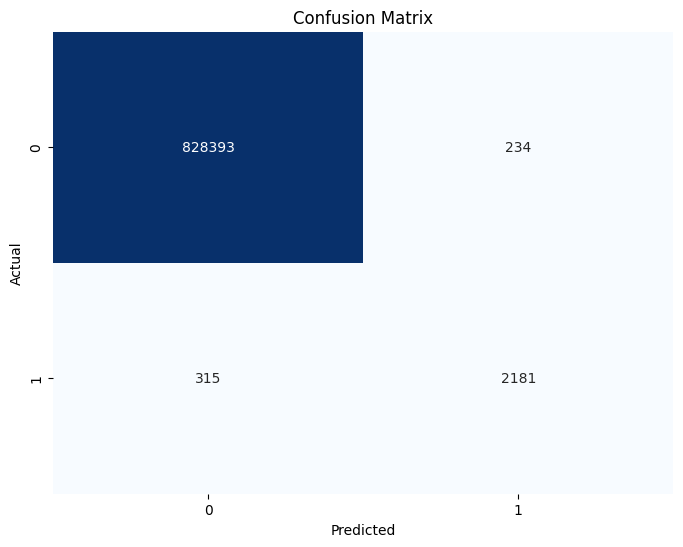

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

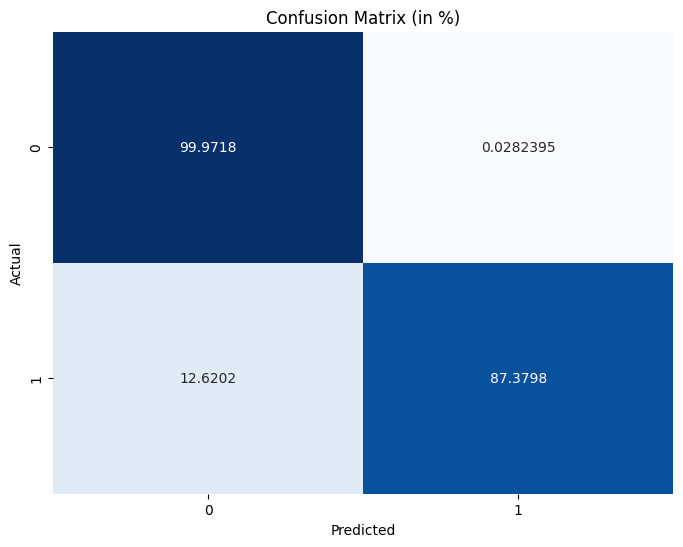

In [31]:
cm = confusion_matrix(y_val, y_pred)
# Calculate percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix (in %)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Applying Explainability to our model

In [17]:
import shap

#Initializing the SHAP explainer
explainer = shap.TreeExplainer(dec_classifier)
# Compute SHAP values for the validation set
shap_values = explainer.shap_values(X_val)

In [24]:
# Check the shape of shap_values and X_val
print("Shape of X_val:", X_val.shape)
#print("Shape of shap_values:", [sv.shape for sv in shap_values])
print(shap_values.shape)

# Reshape the SHAP values to (831123, 8)
shap_values_reshaped = shap_values[:, :, 1]  
# Use shap_values[:, :, 1] for class 1 (fraud)
print(shap_values_reshaped.shape)

Shape of X_val: (831123, 8)
(831123, 8, 2)
(831123, 8)


In [40]:
# Get feature names after transformation
# For categorical features (one-hot encoded)
oh_feature_names = preprocessor.named_transformers_['OneHotEncoder'].get_feature_names_out(cat_features)

# For numeric features (unchanged by StandardScaler)
numeric_feature_names = num_features

# Concatenate all feature names
features_name = list(oh_feature_names) + list(numeric_feature_names)

print("Final Feature Names:")
print(features_name)

Final Feature Names:
['type_CASH_OUT', 'type_TRANSFER', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']


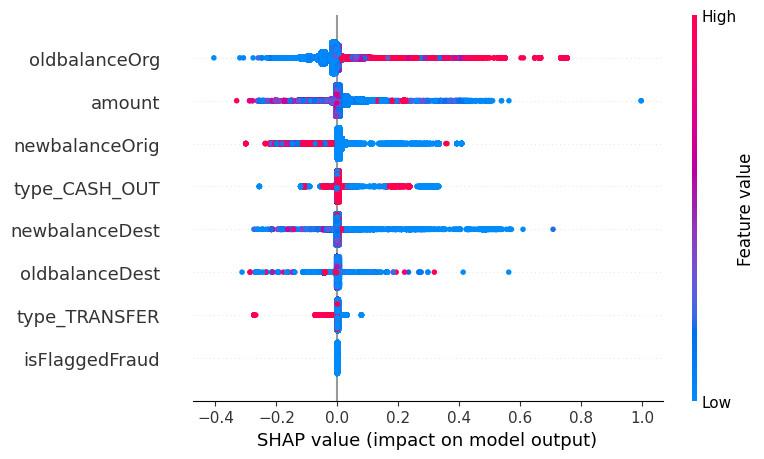

In [43]:
# Plot the SHAP summary plot with feature names
shap.summary_plot(shap_values_reshaped, X_val, feature_names=features_name)

### The Explaination for the following Summary Plot from SHAP for validation data set

#### oldbalanceOrg (Initial Balance of the Origin Account):
- High values (red) generally have a negative SHAP value, indicating they decrease the likelihood of fraud.
- Low values (blue) generally have a positive SHAP value, indicating they increase the likelihood of fraud.

##### amount (Transaction Amount):
- High values (red) generally have a positive SHAP value, strongly increasing the likelihood of fraud.
- Low values (blue) generally have a negative SHAP value, decreasing the likelihood of fraud.

##### newbalanceOrig (New Balance of the Origin Account):
- High values (red) generally have a negative SHAP value, decreasing the likelihood of fraud.
- Low values (blue) generally have a positive SHAP value, increasing the likelihood of fraud.

##### type_CASH_OUT (Transaction Type is CASH-OUT):
The impact is mixed but generally, high values (indicating a CASH-OUT type) tend to increase the likelihood of fraud.

##### newbalanceDest (New Balance of the Destination Account):
The effect is more dispersed, with both high and low values showing a spread of SHAP values, indicating varying impacts on the likelihood of fraud.

##### oldbalanceDest (Initial Balance of the Destination Account):
Similar to newbalanceDest, the SHAP values are dispersed, showing varying impacts.

##### type_TRANSFER (Transaction Type is TRANSFER):
- High values (indicating a TRANSFER type) generally have positive SHAP values, increasing the likelihood of fraud.
- Low values generally have negative SHAP values, decreasing the likelihood of fraud.

##### isFlaggedFraud (Transaction Flagged as Fraud):
- High values (indicating the transaction is flagged as fraud) have strong positive SHAP values, significantly increasing the likelihood of fraud.
- Low values have negative SHAP values, decreasing the likelihood of fraud.

#### Summary of SHAP Summary plot
- High Transaction amount are strong indicator of fraud transaction.
- the transaction for whom isFlaggedFraud value is set to 1, has high likelyhood to be detected as fraud transaction.
- Low new balance of the origin also increases the likelihood of fraud. 

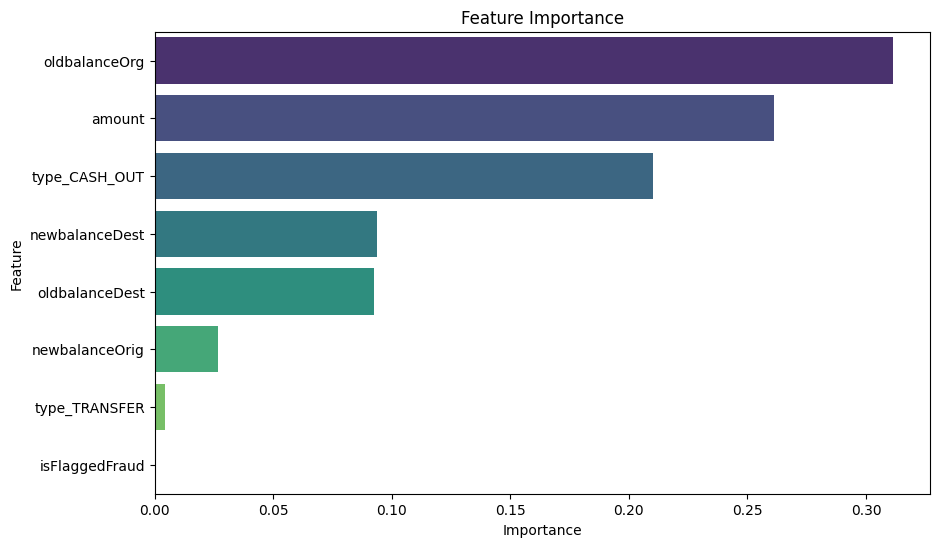

In [45]:
# Calculate feature importances
feature_importances = dec_classifier.feature_importances_

# Combine feature names and importances, then sort by importance in descending order
feature_importances_sorted = sorted(zip(feature_importances, features_name), reverse=True)

# Extract sorted importances and names
importances_sorted = [importance for importance, _ in feature_importances_sorted]
names_sorted = [name for _, name in feature_importances_sorted]

# Plot normal feature importance histogram
plt.figure(figsize=(10, 6))
sns.barplot(x=importances_sorted, y=names_sorted, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### The analysis of above feature importance graph
- oldBalanceOrg and amount are the two most crucial features for predicting fraud tranaction.
- it means that generally, the original balance of the customer plays a crucial role in detecting whether the fraud transaction might occur or not.
- The amount also plays an important role. 
- One more observation is that isFlaggedFraud has given the least importance. Which could be because of the fact that flagged transaction are already identified as potentially fraud transaction. So it does not contribute much in altering the output.

### CONCLUSION:
yes, the factors involved in fraud prediction definitely make sense.
- Large transaction amount are genrally flagged as suspecious transaction and may attempt to transfer significant amount in a single transaction.
- Fraudulent activities often involve cashing out stolen funds quickly. Hence, CASH-OUT transactions are critical in identifying potential fraud.
- If suddenly there is an crediting in recipient account with a huge amount or comparitively huge amount then this might increase the probability of fraud transaction to occur.

In similar manner, every feature has an appropriate significance in detecting fraud transaction.

#### What Kind of Prevention Should Be Adopted While the Company Updates Its Infrastructure?
1. Multi-factor Authentication: Company should make it compulsion on the customer to practice MFA for initiating high-value transactions.
2. With the help of Machine Learning model periodic analysis of the transaction should be practiced by the company. This helps the company to detect the pattern of fraud Transaction. For example, it was during EDA (Exploratory Data Analysis) Step that we were able to figure that in only two type of payment method the fraud has been detected.
3. Regular Audits and Penetration Testing - This will help fixing the vulnerabilities in the system.

#### Assuming These Actions Have Been Implemented, How Would You Determine If They Work?
1. User feedback- This is one of the most important tool to analyse the improvement in services and security.
2. There are several metrics available in Machine Learning and Data Science tools that will help you to understand comparative improvement or degradation in the model performance.
3. Instead of bringing new implementation into use for all the user, we should first test it on the small batch of user and check whether the solution is in favour of the public or not.
4. Use the insights gained from monitoring and analysis to continuously improve the fraud detection and prevention system.